In [131]:
#Nation Chiao Tung University Apllied Mathematics PMS 2019 fall
#Introduction to Practice of Mathematics Software
#biweekly quiz 3
#author : Maxwill Lin, 0712238
import sys
import numpy as np
from numpy import exp, log
from matplotlib import pyplot as plt

In [132]:
def f(x):
    return x*x*x*x - 3*x*x*x + x*x + x + 1
def df(x):
    return 4*x*x*x - 9*x*x + 2*x + 1

eps = 1e-5

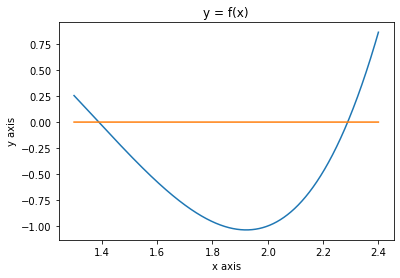

In [133]:

x = np.arange(1.3, 2.4, (2.4-1.3)/10000)
y = f(x)
y2 = np.zeros(len(x))
plt.title("y = f(x)") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

In [134]:
def Muller(f, x0, x1, x2, eps, M = 50):
    print("solving f with Muller's Method\n".format(f))
    x = [x0, x1, x2]
    x.sort()
    for R in range(M):
        fx = [f(xi) for xi in x]
        h1 = x[1]-x[0]
        h2 = x[2]-x[1]
        d1 = (fx[1]-fx[0])/h1
        d2 = (fx[2]-fx[1])/h2
        d = (d2-d1)/(h1+h2)
        b = d2+h2*d
        
        D = np.sqrt(b*b-4*d*fx[2])
        if abs(b-D) < abs(b+D):
            E = b+D
        else:
            E = b-D
        
        h = (-2)*fx[2]/E
        p = x[2]+h
        print("round {} | sol {} | f(sol) {}".format(R+1, p, f(p)))
        if abs(h) < eps:
            print("converge in {} steps".format(R+1))
            return p
        x = [x1, x2, p]
    print("no converge in {} steps, return -1".format(R+1))
    return -1
        

In [135]:
#Newton's method
def Newton(x0, f, fp, eps, M = 50):
    print("solve f with Newton's Method\n") #.format(f.__doc__)
    x1 = x0 + eps + 1000
    for R in range(M):
        x1 = x0 - f(x0)/fp(x0)
        print("round {} | sol {} | f(sol) {}".format(R+1, x1, f(x1)))
        if(abs(x1-x0) < eps):
            print("converge within {} rounds".format(R+1))
            return x1
        x0, x1 = x1, x0

    print("doesn't converge to solution within eps = {}, MaxIter = {}".format(eps, R+1))
    
    return x0, R

In [136]:
x0 = 1.0
x1 = 1.1
x2 = 1.2
Muller(f, x0, x1, x2, eps)

solving f with Muller's Method

round 1 | sol 1.3783900315617055 | f(sol) 0.03153964790220232
round 2 | sol 1.388973852747255 | f(sol) 0.001194867323801141
round 3 | sol 1.3893747545133153 | f(sol) 4.566033431729899e-05
round 4 | sol 1.3893900744328864 | f(sol) 1.7454310274889195e-06
round 5 | sol 1.389390660058494 | f(sol) 6.672242292005137e-08
converge in 5 steps


1.389390660058494

In [137]:
x0 = 2.0
x1 = 2.1
x2 = 2.2
Muller(f, x0, x1, x2, eps)

solving f with Muller's Method

round 1 | sol 2.293393970916912 | f(sol) 0.029640693932468487
round 2 | sol 2.288722993497999 | f(sol) -0.0004600472372175979
round 3 | sol 2.2887961196907742 | f(sol) 7.2053331336974225e-06
round 4 | sol 2.288794974531839 | f(sol) -1.1283503154047025e-07
converge in 4 steps


2.288794974531839

In [138]:
x0 = 1.0
Newton(x0, f, df, eps, M = 50)

solve f with Newton's Method

round 1 | sol 1.5 | f(sol) -0.3125
round 2 | sol 1.3863636363636365 | f(sol) 0.008677739310839927
round 3 | sol 1.3893904836850839 | f(sol) 5.723006506475059e-07
round 4 | sol 1.3893906833349323 | f(sol) 4.884981308350689e-15
converge within 4 rounds


1.3893906833349323

In [139]:
x0 = 2.0
Newton(x0, f, df, eps, M = 50)

solve f with Newton's Method

round 1 | sol 3.0 | f(sol) 13.0
round 2 | sol 2.6176470588235294 | f(sol) 3.6117196573316828
round 3 | sol 2.3962304962788585 | f(sol) 0.8309074801032037
round 4 | sol 2.3054312220601156 | f(sol) 0.10961722865910417
round 5 | sol 2.28928571461565 | f(sol) 0.0031388181329594644
round 6 | sol 2.28879543747511 | f(sol) 2.8456123244424703e-06
round 7 | sol 2.288794992188854 | f(sol) 2.3492319201068312e-12
converge within 7 rounds


2.288794992188854

In [143]:
#we can see that muller's method performed similarly to Newton's method in this case
#withput having to compute df/dx